# Progetto IA II: Classificazione

## Librerie

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

## Caricamento del dataset



In [ ]:
# Carichiamo il dataset e visualizziamo il numero e il formato delle features:
dataset_path = "https://raw.githubusercontent.com/Bernaa04/progetto_IA2/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(dataset_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Preprocessing & feature engneering

### Pulizia del dataset

In [ ]:
# Due osservazioni iniziali:

# 1. La feature "customerID" non ha alcuna rilevanza ai fini della classificazione, decidiamo di rimuoverla;
if "customerID" in data.columns: data.drop(columns=["customerID"], inplace=True)

# 2. La feature "TotalCharges" è il prodotto di "MonthlyCharges" e "tenure": mantenere tutte e tre potrebbe causare multicollinearità. Pertanto, decidiamo di rimuoverla;
if "TotalCharges" in data.columns: data.drop(columns=["TotalCharges"], inplace=True)

In [ ]:
# Procediamo con l'individuazione della variabile target e procediamo con la sua conversione in numerico(dall'attuale datatype object)
data["Churn"] = (data["Churn"] == "Yes").astype(int)

In [ ]:
# Nonostante la prima verifica fatta con data.info(), per assicurarci che non vi sia nessun valore nullo, decidiamo di procedere con una verifica più approfondita;
valori_nulli = ["", "none", "n/a", "na", "null", "?"]
print("RICERCA VALORI NULLI - dtype object:")
print(data.select_dtypes(include="object").apply(lambda x: x.astype(str).str.strip().str.lower().isin(valori_nulli).sum()))
print("\n")
print("RICERCA VALORI NULLI - dtype numerico:")
print(data.isna().sum())

RICERCA VALORI NULLI - dtype object:
gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
dtype: int64


RICERCA VALORI NULLI - dtype numerico:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64


### One-hot encoding

In [ ]:
# Il passo successivo consiste nell'operazione di one-hot encoding, in modo da dummificare e rendere binari i valori 'object'.
# Nel primo encoding, che utilizzeremo ai fini di una visualizzazione grafica più completa, utilizziamo drop_first=False
# In un encoding successivo, al fine di evitare la multicollinearità, utilizzeremo drop_first=True
data_dummy_provv = pd.get_dummies(data, drop_first=False, dtype=int)

data_dummy_provv.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


##  Analisi esplorativa dei dati

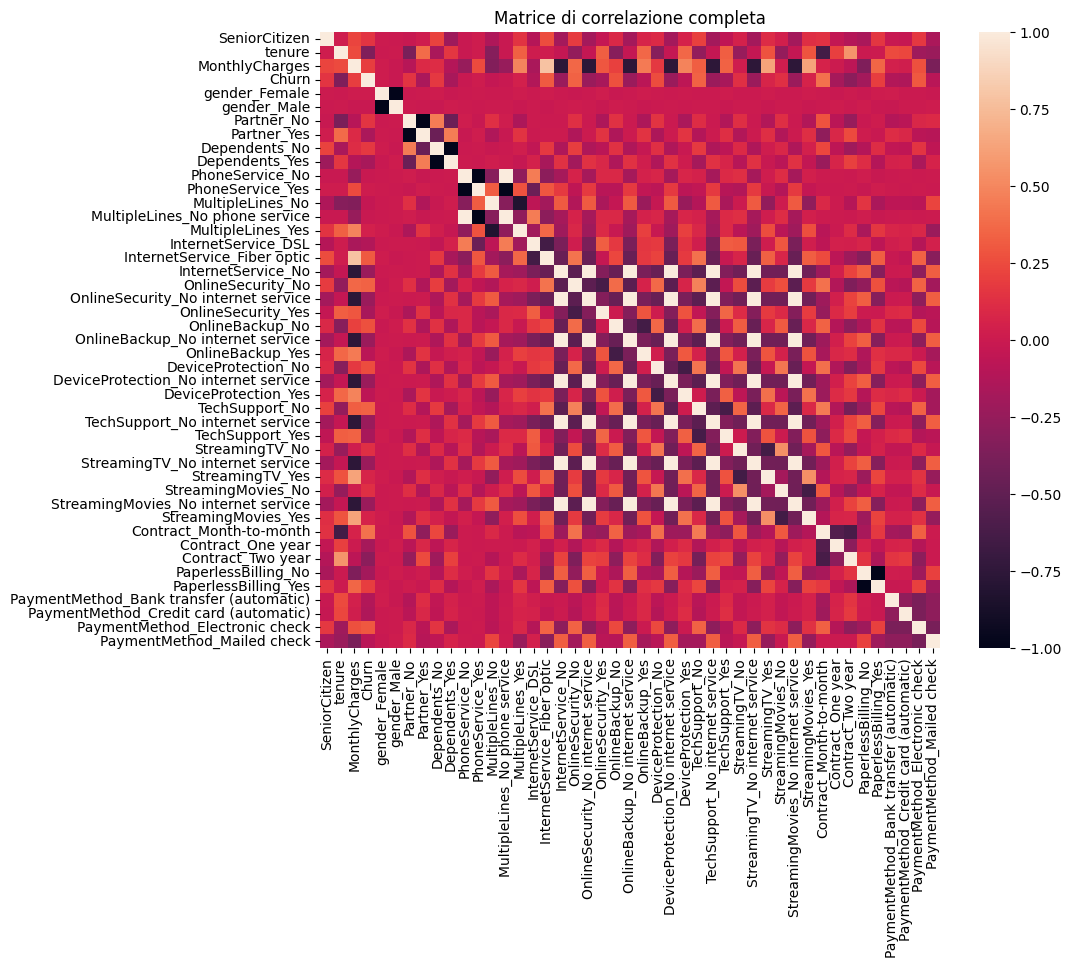

In [ ]:
## Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_dummy_provv.corr(), xticklabels=True, yticklabels=True)
plt.title("Matrice di correlazione completa")
plt.show()
print("\n\n")

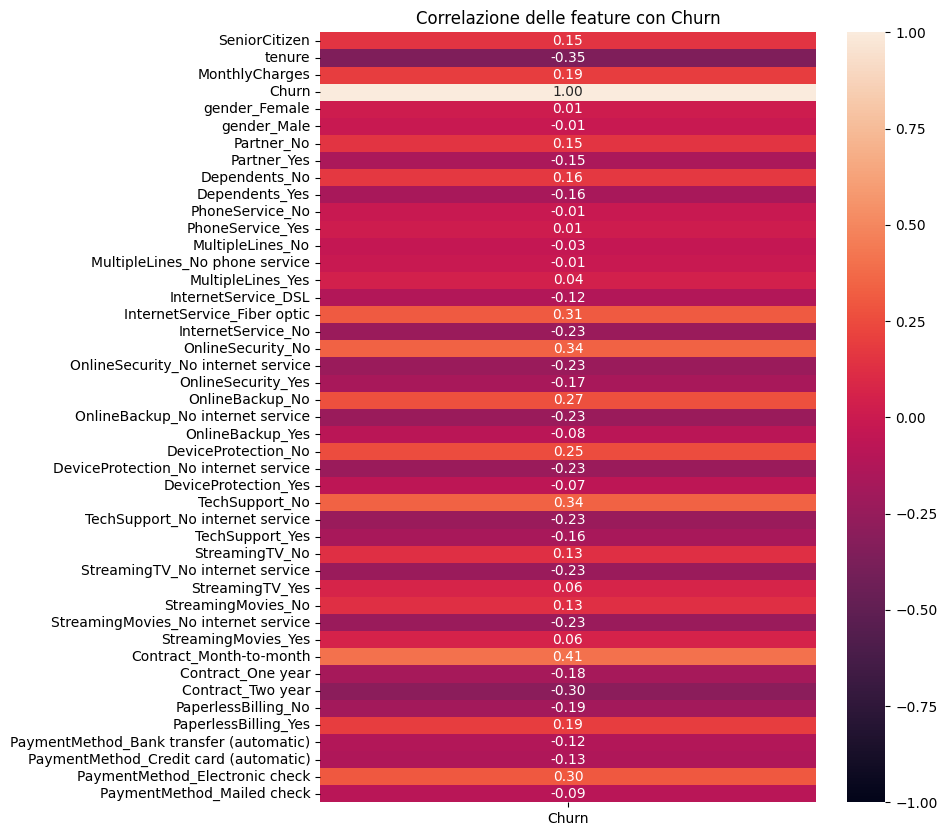

In [ ]:
# Notiamo che tutte le righe che finiscono con "No internet service" risultano essere ridondanti rispetto a "Internet Service".

## Analizziamo poi una heatmap esclusivamente incentrata sulla variabile target, per avere una visione più immediata
## delle variabili considerabili significative.
plt.figure(figsize=(8, 10))
sns.heatmap(data_dummy_provv.corr()[["Churn"]], xticklabels=True, yticklabels=True, annot = True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlazione delle feature con Churn")
plt.show()

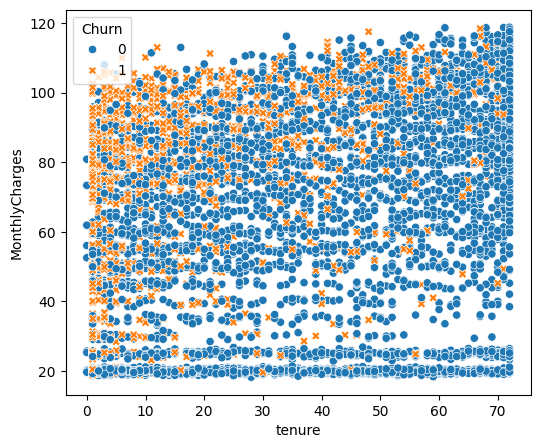

In [ ]:
## Scatterplot
plt.figure(figsize=(6, 5))
sns.scatterplot(data = data_dummy_provv, x = "tenure", y = "MonthlyCharges", hue = "Churn", style= "Churn")
plt.show()
print("\n\n")

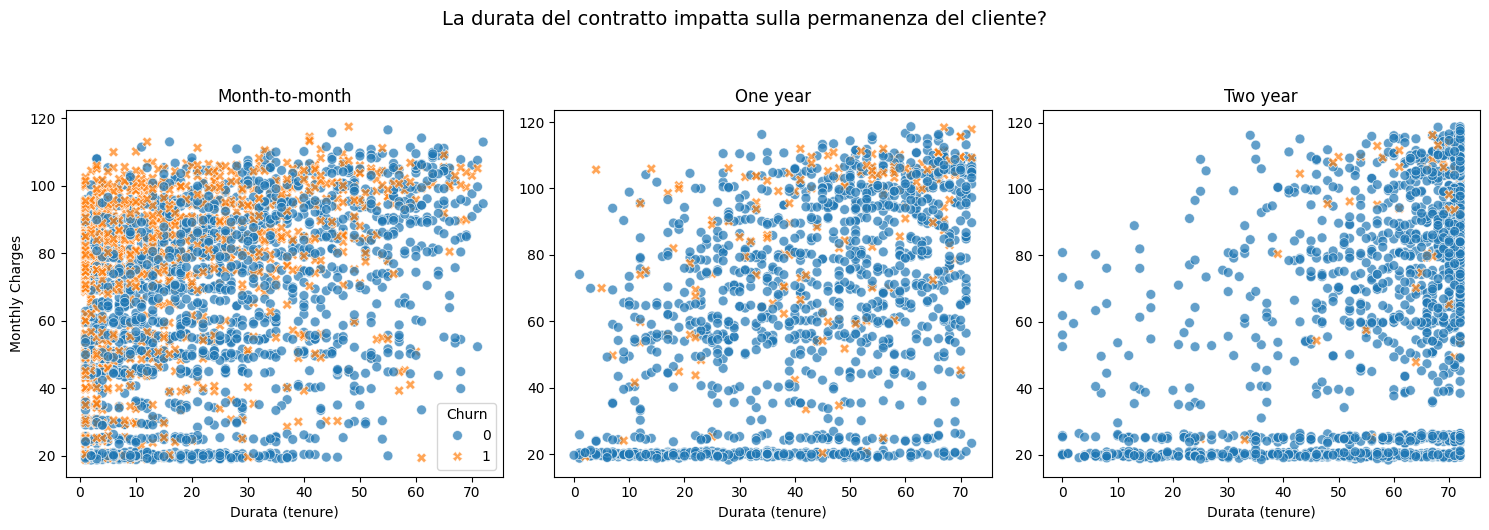

In [ ]:
# Notiamo un pattern abbastanza definito - visualizziamo, per meglio comprenderlo, anche la correlazione con il tipo di contratto
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, contract_type in enumerate(data["Contract"].unique()):
    contract_data = data[data["Contract"] == contract_type]
    sns.scatterplot(data=contract_data, x="tenure", y="MonthlyCharges", hue="Churn", style="Churn", ax=axes[i], alpha=0.7, s=50,)
    axes[i].set_title(contract_type)
    axes[i].set_xlabel("Durata (tenure)")

    if i == 0:
        axes[i].set_ylabel("Monthly Charges")
    else:
        axes[i].set_ylabel("")

    if i > 0:
        axes[i].get_legend().remove()

plt.suptitle("La durata del contratto impatta sulla permanenza del cliente?", y=1.05, fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

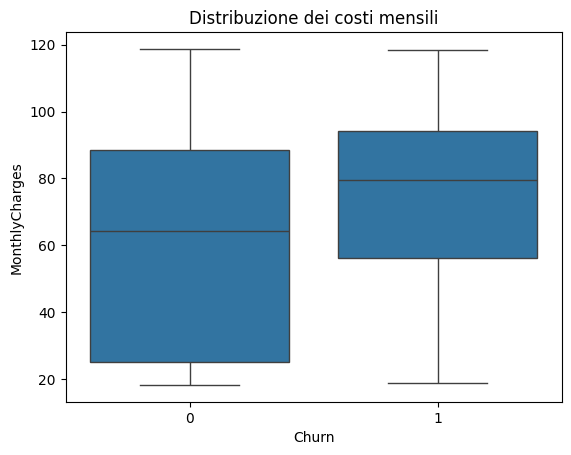

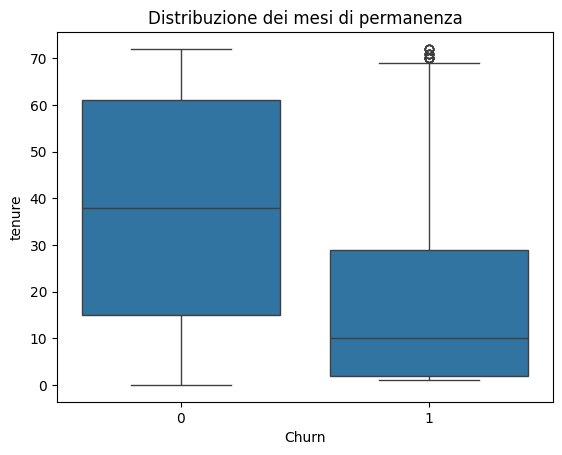

In [ ]:
## Boxplot

# Per analizzare meglio queste relazioni attuamo una ricerca più specifica sulle variabili numeriche
# (non dummificate) rispetto a Churn, realizzando dei boxplot.

### 1. MonthlyCharges
sns.boxplot(x = "Churn", y = "MonthlyCharges", data = data_dummy_provv)
plt.title("Distribuzione dei costi mensili")
plt.show()
print("\n\n")

### 2. tenure
sns.boxplot(x = "Churn", y = "tenure", data = data_dummy_provv)
plt.title("Distribuzione dei mesi di permanenza")
plt.show()

### Dummificazione con drop_first=True

In [ ]:
data_dummy = pd.get_dummies(data, drop_first=True, dtype=int)

### Verifica del bilanciamento delle classi

In [ ]:
# Visualizziamo alcune statistiche rilevanti per Churn
data.describe()[["Churn"]]

,Churn
count,7043.000000
mean,0.265370
std,0.441561
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# La distribuzione nel dataset tra i clienti fidelizzati e i clienti che abbandonano il servizio difficilmente sarà equa:
print("Distribuzione Variabile Target [Churn]:")
print((data["Churn"].value_counts()/len(data_dummy)) * 100)

Distribuzione Variabile Target [Churn]:
Churn
0    73.463013
1    26.536987
Name: count, dtype: float64


## Preparazione dati per addestramento

In [ ]:
# Lista delle colonne che vogliamo rimuovere perché ridondanti

da_eliminare = ["OnlineSecurity_No internet service", "OnlineBackup_No internet service",
                "DeviceProtection_No internet service","TechSupport_No internet service",
                "StreamingTV_No internet service","StreamingMovies_No internet service",
                "MultipleLines_No phone service"]

# Creiamo il dataframe finale ottimizzato
data2 = data_dummy.drop(columns = da_eliminare)

print("Colonne rimosse:", da_eliminare)

Colonne rimosse: ['OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'MultipleLines_No phone service']


In [ ]:
# Definizione Features (X) e Target (y)
X = data2.drop("Churn", axis = 1)
y = data2["Churn"]

In [ ]:
# Divisione del dataset training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

### Normalizzazione

In [ ]:
# Selezioniamo le features numeriche
features_numeriche = ["tenure", "MonthlyCharges"]

# Selezioniamo un paio di features binarie per il confronto
features_binarie = ["SeniorCitizen", "Churn"]

# Uniamo le liste per analizzarle congiuntamente
colonne_da_analizzare = features_numeriche + features_binarie

# Visualizziamo la tabella finale
statistiche = data[colonne_da_analizzare].describe()

print("STATISTICHE")
print(statistiche)
print("\n")

STATISTICHE
            tenure  MonthlyCharges  SeniorCitizen        Churn
count  7043.000000     7043.000000    7043.000000  7043.000000
mean     32.371149       64.761692       0.162147     0.265370
std      24.559481       30.090047       0.368612     0.441561
min       0.000000       18.250000       0.000000     0.000000
25%       9.000000       35.500000       0.000000     0.000000
50%      29.000000       70.350000       0.000000     0.000000
75%      55.000000       89.850000       0.000000     1.000000
max      72.000000      118.750000       1.000000     1.000000




In [ ]:
# Come tecnica di normalizzazione usiamo MinMaxScaler
scaler = MinMaxScaler()
X_train[features_numeriche] = scaler.fit_transform(X_train[features_numeriche])
X_test[features_numeriche] = scaler.transform(X_test[features_numeriche])

## 1. Modello Base - errore non bilanciato

In [ ]:
# Creazione del modello
RLogistica = LogisticRegression()

# Addestramento
RLogistica.fit(X_train, y_train)

# Previsione ("Predict")
y_predetta = RLogistica.predict(X_test)

# Calcoliamo l'Accuracy, la Precision e la Recall per il confronto finale
acc = accuracy_score(y_test, y_predetta)
precision_base_nb = precision_score(y_test, y_predetta)
recall_base_nb = recall_score(y_test, y_predetta)

print(f"\nAccuratezza sul Test Set: {acc:.2%}")


Accuratezza sul Test Set: 79.63%


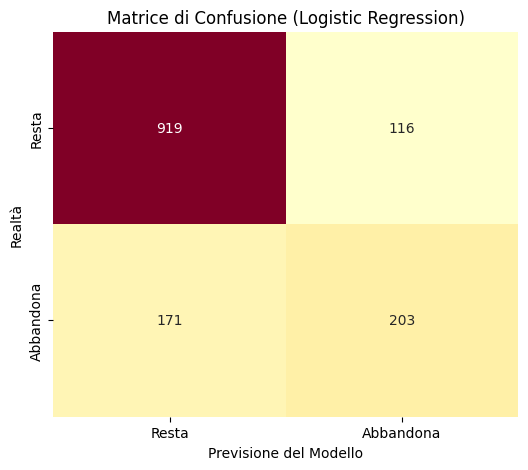



RIEPILOGO
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
# Generiamo la matrice di confusione
mc1 = confusion_matrix(y_test, y_predetta)

plt.figure(figsize=(6, 5))
sns.heatmap(mc1, annot=True, fmt="d", cmap="YlOrRd", cbar=False,
            xticklabels=["Resta", "Abbandona"], yticklabels=["Resta", "Abbandona"])
plt.title("Matrice di Confusione (Logistic Regression)")
plt.xlabel("Previsione del Modello")
plt.ylabel("Realtà")
plt.show()
print("\n")

# Calcoliamo la AUC per il confronto finale tra i modelli
AUC_b = roc_auc_score(y_test, y_predetta)

# Stampiamo il report
print("RIEPILOGO")
print(classification_report(y_test, y_predetta))

## 2. Modello Base - errore bilanciato

In [ ]:
# 1. Creazione del modello
RLogistica2 = LogisticRegression(class_weight="balanced", random_state=42)

# 2. Addestramento
RLogistica2.fit(X_train, y_train)

# 3. Previsione ("Predict")
y_predetta_log = RLogistica2.predict(X_test)

# 4. Calcoliamo la Precision e la Recall per il confronto finale
precision_base_b = precision_score(y_test, y_predetta_log)
recall_base_b = recall_score(y_test, y_predetta_log)

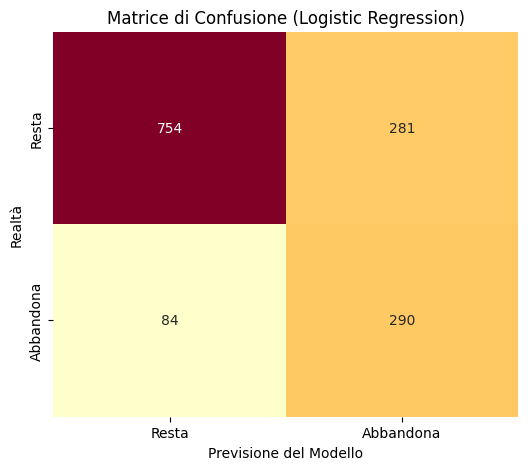



RIEPILOGO
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [ ]:
# Generiamo la matrice di confusione
mc_bil = confusion_matrix(y_test, y_predetta_log)

plt.figure(figsize=(6, 5))
sns.heatmap(mc_bil, annot=True, fmt="d", cmap="YlOrRd", cbar=False,
            xticklabels=["Resta", "Abbandona"],
            yticklabels=["Resta", "Abbandona"])
plt.title("Matrice di Confusione (Logistic Regression)")
plt.xlabel("Previsione del Modello")
plt.ylabel("Realtà")
plt.show()
print("\n")

# Calcoliamo la AUC per il confronto finale tra i modelli
AUC_b1 = roc_auc_score(y_test, y_predetta_log)

# Stampiamo il report
print("RIEPILOGO")
print(classification_report(y_test, y_predetta_log))

## 3. Modello Base - Soglia Ottima

In [ ]:
# 1. Creiamo il terzo modello
RLogistica3 = LogisticRegression(class_weight="balanced", random_state=42)

# 2. Ricorriamo alla cross-validation per non calcolare la soglia includendo il test set e causando una data leakage
y_prob_cv = cross_val_predict(RLogistica3, X_train, y_train, cv=5, method='predict_proba')[:, 1]

In [ ]:
# 3. Calcolo soglia ottima:
soglie = np.linspace(0, 1, 100)
F2_scores = [fbeta_score(y_train, (y_prob_cv >= s).astype(int), beta=2) for s in soglie]
soglia_ottima_1 = soglie[np.argmax(F2_scores)]

In [ ]:
# 4. Fit modello
RLogistica3.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
# 5. Predizione sul test set
y_prob = RLogistica3.predict_proba(X_test)[:, 1]
y_soglia = (y_prob >= soglia_ottima_1).astype(int)

AUC Score: 0.7497
Soglia Ottimale calcolata: 0.3535


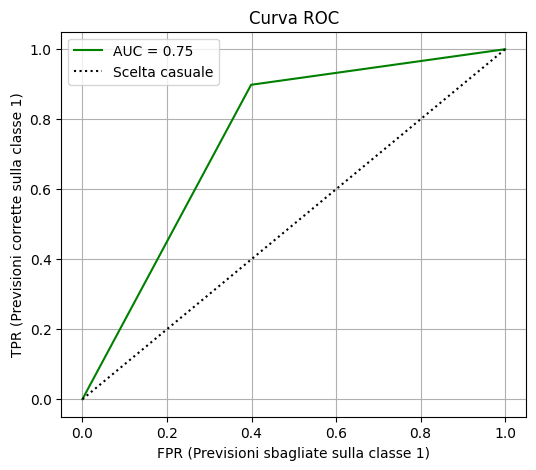

In [ ]:
# 6. Calcoliamo FPR e TPR
FPR, TPR, _ = roc_curve(y_test, y_soglia)

# 7. Visualizziamo AUC e soglia ottimale
AUC = roc_auc_score(y_test, y_soglia)
print(f"AUC Score: {AUC:.4f}")
print(f"Soglia Ottimale calcolata: {soglia_ottima_1:.4f}")

# 7. Visualizziamo la ROC
plt.figure(figsize=(6, 5))
plt.plot(FPR, TPR, label=f"AUC = {AUC:.2f}", color = "green")
plt.plot([0, 1], [0, 1], 'k:', label = "Scelta casuale")
plt.xlabel("FPR (Previsioni sbagliate sulla classe 1)")
plt.ylabel("TPR (Previsioni corrette sulla classe 1)")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()
print("\n")

## Calcoliamo anche la Precision e la Recall, nonostante siano già presenti nel confronto finale, solo per riutilizzarle alla fine
precision_base_ott = precision_score(y_test, y_soglia)
recall_base_ott = recall_score(y_test, y_soglia)

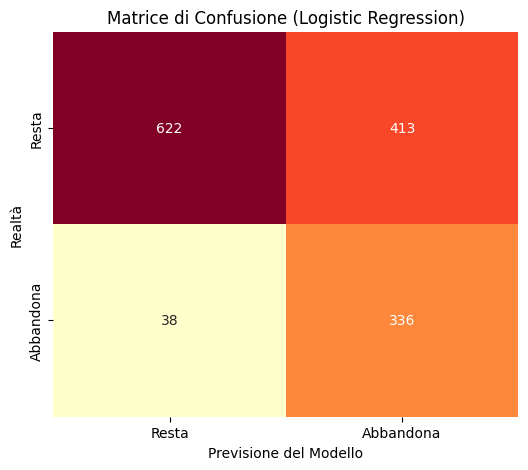



RIEPILOGO
              precision    recall  f1-score   support

           0       0.94      0.60      0.73      1035
           1       0.45      0.90      0.60       374

    accuracy                           0.68      1409
   macro avg       0.70      0.75      0.67      1409
weighted avg       0.81      0.68      0.70      1409



In [ ]:
# Generiamo la matrice di confusione
mc_soglia = confusion_matrix(y_test, y_soglia)

plt.figure(figsize=(6, 5))
sns.heatmap(mc_soglia, annot=True, fmt="d", cmap="YlOrRd", cbar=False,
            xticklabels=["Resta", "Abbandona"],
            yticklabels=["Resta", "Abbandona"])
plt.title("Matrice di Confusione (Logistic Regression)")
plt.xlabel("Previsione del Modello")
plt.ylabel("Realtà")
plt.show()
print("\n")

# report finale
print("RIEPILOGO")
print(classification_report(y_test, y_soglia))

## Creazione modelli "tematici"

In [ ]:
# Valutazione di modelli mirati su particolari features, divise per "area tematica"

gruppo_finanziario = ["MonthlyCharges", "Contract_One year", "Contract_Two year",
                      "PaymentMethod_Electronic check", "PaperlessBilling_Yes"]

gruppo_tecnico = ["InternetService_Fiber optic", "InternetService_No", "OnlineSecurity_Yes", "TechSupport_Yes"]

gruppo_demografico = ["SeniorCitizen", "Partner_Yes", "Dependents_Yes", "gender_Male"]


In [ ]:
def valutazione_modello_tematico(X_train_tema, X_test_tema, y_train, y_test, nome_modello):

    print(f"ANALISI MODELLO: {nome_modello.upper()}")

    # 1. Definiamo il modello
    RLtematica = LogisticRegression(class_weight = "balanced", random_state = 42)

    # 2. Cross-validation e calcolo soglia
    y_prob_training = cross_val_predict(RLtematica, X_train_tema, y_train, cv=5, method='predict_proba')[:, 1]

    soglie_2 = np.linspace(0, 1, 100)
    F2_tema = [fbeta_score(y_train, (y_prob_training >= z).astype(int), beta=2) for z in soglie_2]
    soglia_ottima_2 = soglie_2[np.argmax(F2_tema)]

    # 3. Addestriamo il modello
    RLtematica.fit(X_train_tema, y_train)

    # 4. Calcoliamo la probabilità, ROC e AUC
    y_prob_2 = RLtematica.predict_proba(X_test_tema)[:, 1]
    FPR_2, TPR_2, _ = roc_curve(y_test, y_prob_2)
    AUC_2 = roc_auc_score(y_test, y_prob_2)

    # 5. Predizione con soglia ottimale
    y_pred_ottima = (y_prob_2 >= soglia_ottima_2).astype(int)

    # 6. Calcolo Precision e Recall (per la comparazione finale)
    recall_tema = recall_score(y_test, y_pred_ottima)
    precision_tema = precision_score(y_test, y_pred_ottima)

    # 7. Output Testuale
    print(f"AUC Score: {AUC_2:.4f}")
    print(f"Soglia Ottimale calcolata: {soglia_ottima_2:.4f}")
    print(f"precision (alla soglia ottima): {precision_tema:.2f}")
    print(f"recall (alla soglia ottima): {recall_tema:.2f}")
    print("\n Report di Classificazione (con soglia ottimizzata)")
    print(classification_report(y_test, y_pred_ottima))

    # 8. Matrice di Confusione
    mc_tema = confusion_matrix(y_test, y_pred_ottima)

    plt.figure(figsize=(6, 5))
    sns.heatmap(mc_tema, annot = True, fmt = "d", cmap = "YlOrRd", cbar = False,
                xticklabels=["Resta", "Abbandona"], yticklabels=["Resta", "Abbandona"])
    plt.title(f"Matrice di confusione - {nome_modello}\n(Soglia: {soglia_ottima_2:.4f})")
    plt.ylabel("Realtà")
    plt.xlabel("Previsione")
    plt.show()
    print("\n\n")

    return AUC_2, soglia_ottima_2, recall_tema, precision_tema

### 4. Modello Finanziario - Soglia Ottima

ANALISI MODELLO: GRUPPO FINANZIARIO
AUC Score: 0.7929
Soglia Ottimale calcolata: 0.3333
precision (alla soglia ottima): 0.41
recall (alla soglia ottima): 0.92

 Report di Classificazione (con soglia ottimizzata)
              precision    recall  f1-score   support

           0       0.95      0.52      0.67      1035
           1       0.41      0.92      0.57       374

    accuracy                           0.63      1409
   macro avg       0.68      0.72      0.62      1409
weighted avg       0.80      0.63      0.64      1409



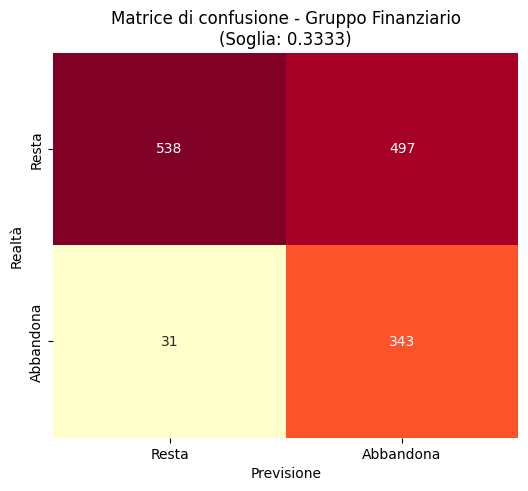

In [ ]:
# Modello A: Finanziario
auc_fin, soglia_fin, recall_fin, precision_fin = valutazione_modello_tematico(X_train[gruppo_finanziario], X_test[gruppo_finanziario], y_train, y_test, "Gruppo Finanziario")

### 5. Modello Tecnico - Soglia Ottima

ANALISI MODELLO: GRUPPO TECNICO
AUC Score: 0.7549
Soglia Ottimale calcolata: 0.2020
precision (alla soglia ottima): 0.35
recall (alla soglia ottima): 0.90

 Report di Classificazione (con soglia ottimizzata)
              precision    recall  f1-score   support

           0       0.91      0.40      0.55      1035
           1       0.35      0.90      0.50       374

    accuracy                           0.53      1409
   macro avg       0.63      0.65      0.53      1409
weighted avg       0.76      0.53      0.54      1409



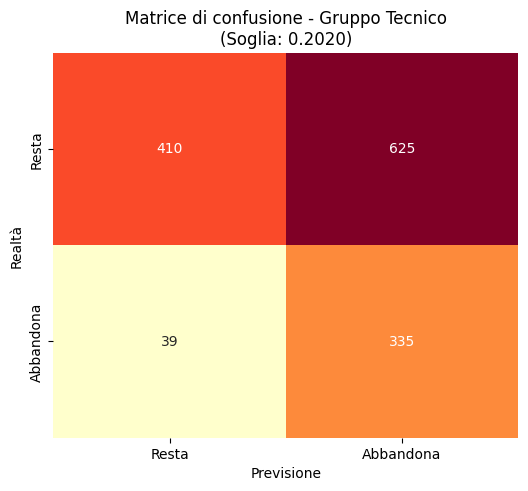

In [ ]:
# Modello B: Tecnico
auc_tec, soglia_tec, recall_tec, precision_tec = valutazione_modello_tematico(X_train[gruppo_tecnico], X_test[gruppo_tecnico], y_train, y_test, "Gruppo Tecnico")

### 6. Modello Demografico - Soglia Ottima

ANALISI MODELLO: GRUPPO DEMOGRAFICO
AUC Score: 0.6505
Soglia Ottimale calcolata: 0.0000
precision (alla soglia ottima): 0.27
recall (alla soglia ottima): 1.00

 Report di Classificazione (con soglia ottimizzata)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1035
           1       0.27      1.00      0.42       374

    accuracy                           0.27      1409
   macro avg       0.13      0.50      0.21      1409
weighted avg       0.07      0.27      0.11      1409



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


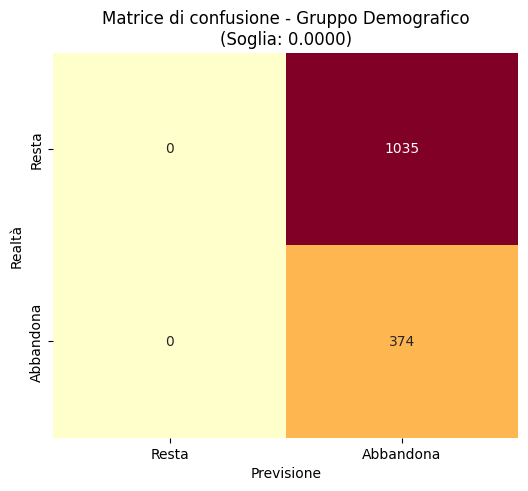

In [ ]:
# Modello C: Demografico
auc_demo, soglia_demo, recall_demo, precision_demo = valutazione_modello_tematico(X_train[gruppo_demografico], X_test[gruppo_demografico], y_train, y_test, "Gruppo Demografico")

### Confronto provvisorio fra tutti i modelli

In [ ]:
print("CONFRONTO PROVV. (SOGLIA F2)      AUC | Recall | Prec | Soglia\n")
print(f"1. Modello base non bilanciato:  {AUC_b:.2f} |  {recall_base_nb:.2f}  | {precision_base_nb:.2f} | - ")
print(f"2. Modello base bilanciato:      {AUC_b1:.2f} |  {recall_base_b:.2f}  | {precision_base_b:.2f} | - ")
print(f"3. Modello base SO:              {AUC:.2f} |  {recall_base_ott:.2f}  | {precision_base_ott:.2f} | {soglia_ottima_1:.2f}")
print(f"4. Modello finanziario SO:       {auc_fin:.2f} |  {recall_fin:.2f}  | {precision_fin:.2f} | {soglia_fin:.2f}")
print(f"5. Modello tecnico SO:           {auc_tec:.2f} |  {recall_tec:.2f}  | {precision_tec:.2f} | {soglia_tec:.2f}")
print(f"6. Modello demografico SO:       {auc_demo:.2f} |  {recall_demo:.2f}  | {precision_demo:.2f} | {soglia_demo:.2f}")

CONFRONTO PROVV. (SOGLIA F2)      AUC | Recall | Prec | Soglia

1. Modello base non bilanciato:  0.72 |  0.54  | 0.64 | - 
2. Modello base bilanciato:      0.75 |  0.78  | 0.51 | - 
3. Modello base SO:              0.75 |  0.90  | 0.45 | 0.35
4. Modello finanziario SO:       0.79 |  0.92  | 0.41 | 0.33
5. Modello tecnico SO:           0.75 |  0.90  | 0.35 | 0.20
6. Modello demografico SO:       0.65 |  1.00  | 0.27 | 0.00
